In [5]:
from sklearn import datasets
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,4) # the charts will have a size of width = 15, height = 4
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

# Linear regression with 1 feature

## Generate a dataset for Linear Regression

- with the make_regression() you can generate a synthetical dataset for a regression problem
- here we generate 100 observations with 1 explanatory variable and the standard deviation of the gaussian noise 40
- if you want to read documentation, you can always run the function name with a questionmark before the name like in the cell below. This will open documentation directly in jupyter notebok. You can also read documentation on internet, e.g. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html
- run the 2 cells below

In [6]:
?datasets.make_regression

In [9]:
x, y, coeff = datasets.make_regression(
        n_samples = 100, 
        n_features = 1,
        noise = 40,
        coef = True,
        bias = 50,
        random_state = 42 # if you have read Hitchiker's Guide to the Galaxy then
                          # you know that 42 is the universal answer to life, the universe and everything
                          # https://www.quora.com/Why-do-we-choose-random-state-as-42-very-often-during-training-a-machine-learning-model
    )

We can plot x against y to see how the data look like.

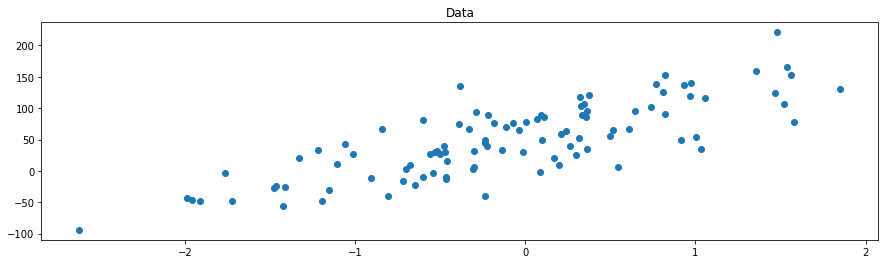

In [10]:
plt.scatter(x,y)
plt.title('Data')
plt.show()

Run the below user defined function that plots the observations and a line and calculates RMSE. You will use this function in the exercise. It takes as inputs x and y, intercept value and a coefficient value.

In [11]:
def plot_regression(x, y, bias, coeff):
    """
    The function plots scatter of x, y and line with bias and coefficient. It also calculates RMSE.
    ---------------
    params:
    - x: points on the x-axis
    - y: points on the y-axis
    - bias: intercept of the line
    - coeff: slope of the line
     """
    y_hat = bias + x * coeff # predictions of x can be calculated easily 
                             # by multiplying the features with coefficients
    print(f'MSE2 : {round(mean_squared_error(y,y_hat),1)}') 
    print(f'RMSE2 : {round(mean_squared_error(y,y_hat,squared=False),1)}')

    # chart
    plt.title('Observations with a line')
    plt.scatter(x,y) # scatter
    plt.plot(x, y_hat, 'r--') # line

### Exercise 
We want to fit a model that looks like this: $\widehat{y} = \beta_0 + \beta_1 x_1 $, where $\beta_0$ is a bias term and $\beta_1$ is the slope of the line

Use the function plot_regression() and try different values of bias and coeff of the regression line. Observe the values of the cost function and the behavior of the line with the change of the parameters. 
- How does a line look like if the coeff is positive, negative or zero?
- What is the influence of the bias term on the line?
- Can you guess the suitable set of parameters? 
- What are the units of the MSE and RMSE in relation to dependent variable y? Which one is more intuitive to use for interpretation?

In [12]:
plot_regression(x, y, bias=...,coeff=...)

## Normal Equation

The function `normal_eq()`  computes $ \widehat{\beta}= (X^T X)^{-1} X^T y $. It takes as input x and y and returns optimal values for bias(intercept) term and a coefficient(slope).

In [13]:
def normal_eq(x,y): 
    """The function analytically computes the optimal set of coefficients give x and y. 
A vector of ones is appended as the first vector of matrix x to take into account the bias term. 
    ---------------
    params:
    - x: input features matrix
    - y: target variable
    returns: 
    - beta_hat: optimal set of coefficients for linear regression
    """
    X = np.c_[np.ones(len(x)),x]
    beta_hat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    print(f"Optimal set of coefficients: {beta_hat}")
    return(beta_hat)

### Exercise

- use the `normal_eq()` on input features x and output vector y.
- use the returned values of bias and coef in plot_regression function
- was your guess of the bias and coeff value from the previous exercise close enough?

In [15]:
..., ... = normal_eq(x, y) 
plot_regression(..., ..., ..., ...)

## Sklearn Linear Regression

Here we explore the scikit learn linear regression for the first time. Help yourself with examples in the documentation if needed: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### Exercise
- use LinearRegression() from sklearn.linear_model to fit the linear regression model on x, y. Look at the examples section in the documentation if you need help
- return the coefficients for slope and intercept of the regression line, you will find them in attributes section of the documentation. Store the values in the variables *lr_coef* and *lr_intercept*
    - are these values the same as the ones from the normal equation?

In [27]:
lr = ...
lr.fit(..., ...)
lr_coef, lr_intercept = lr...., lr....
print(f'Slope: {lr_coef}\nBias: {lr_intercept}')

- predict the value of the new observation. If needed use documentation for examples

In [16]:
x_new = [[1.5], [0]]
lr.predict(...)

- return the score of the model on x and y. You can read more about the score in the documentation. The best value is 1. Usually it is between 0 and 1 but can be also negative. Score is R squared metric that can be used for evaluation of the model.

In [18]:
lr.score(..., ...)

## Outliers

We will add outliers to our dataset and save it under the name x2, y2.

In [31]:
x2 = np.append(x,[np.min(x)-0.1, np.min(x), np.min(x)-0.15]).reshape([-1,1])
y2 = np.append(y, [-400,-300,-350]).reshape([-1,1])

### Exercise

Fit the linear regression to x2, y2 and store the bias into the variable *lr_outlier_intercept* and a slope into the variable *lr_outlier_coef*

In [35]:
...
...
...

You can observe on the chart how outliers influence the regression line. Outlier treatment should be one of the first steps done before fitting linear regression model otherwise the results can be biased

In [19]:
plt.scatter(x2,y2)
axes = plt.gca()
x_vals2 = np.array(axes.get_xlim())
y_vals = lr_intercept + lr_coef * x_vals2
y_vals2 = lr_outlier_intercept.reshape([1,]) + lr_outlier_coef.reshape([1,]) * x_vals2
plt.plot(x_vals2, y_vals, 'r--', label='original regression line')
plt.plot(x_vals2, y_vals2, 'b--', label='regression line with outliers')
plt.legend()
plt.show()

# Multiple Linear Regression

## Load Dataset

Load sklearn's inbuilt dataset for regression. If you want you can read the description of the dataset below. It has 13 attributes that can be used for predicting house prices. 

In [20]:
data = datasets.load_boston()

xd,yd = data.data, data.target
x = pd.DataFrame(xd, columns = data.feature_names)
y = pd.DataFrame(yd, columns = ["target"])

print(datasets.load_boston().DESCR)

## Train Test Split

### Exercise 
- use function train_test_split() to split the training data into training and testing dataset

In [45]:
X_train, X_test, y_train, y_test = train_test_split(..., ..., random_state=42)

## Fit the Model
### Exercise
- instantiate linear regression model 
- fit the model to the training data
- print the value of intercept of the model
- return the values of coefficients and save them under the variable model_coef

In [21]:
# instantiate the model
...
# fit the model to x, y
...
print(f"intercept: {...}")
...

We can interpret whether the given feature influences the prediction negatively or positively based on a sign of the coefficient. Also, if all the other variables are unchanged we can say how does the variable affect the output by changing the variable by 1 unit.

In [22]:
df_coefs = pd.DataFrame(model_coef, index = ["Coefficient"], columns=X_train.columns)
display(df_coefs)
print(f"For example, if you have an observation where LSTAT is equal to 50 and another one that has a value of LSTAT 51 and all other variables the same or if the variable LSTAT changed for the investigated observation with other variables unchanged the effect on the target would be {np.round(df_coefs['LSTAT'][0],5)}")

## Prediction / Model Evaluation
### Exercise

- predict on X_test and store the values into y_hat

In [64]:
...

Below is the plot of predictions against real values. Most of the datapoints lie around a diagonal line. This means that predictions seem to be in line with the actual values, e.g. if the real value was 20, the prediction is also mostly 20

In [23]:
plt.scatter(y_hat, y_test)
plt.plot([0,50],[0,50],c='b')
plt.xlabel("predictions")
plt.ylabel("true test values")
plt.show();

### Exercise

Let's have a look at some metrics. Compute on test set and save under respective variables the below metrics

- MSE - look at from sklearn.metrics ?mean_squared_error
- RMSE - mean_squared_error can be used also here. The parameter squared must be set to False
- MAE (Mean absolute error) - see ?mean_absolute_error
- R2 (score) - it is an attribute of the LinearRegression()

In [24]:
mse = mean_squared_error(y_test, y_hat)
rmse = mean_squared_error(..., ..., ...)
mae = ...(..., ...)
r2 = model.score(..., ...) # the same as r2_score(y_test, y_hat)

print(f"MSE: {np.round(mse, 1)}")
print(f"RMSE: {np.round(rmse, 1)}")
print(f"MAE: {np.round(mae, 1)}")
print(f"R2: {np.round(r2, 1)}") 

## Scaling

### Exercise
If the features are not scaled, the intercept tells you what is the expected value of target variable if all the variables were equal 0 which might be unrealistic for many features like weight, size of the house, distance to the sea... When features are scaled the intercept can be interpreted as the expected value of a target variable when all the features are equal to their averages.

- instantiate StandardScaler() from sklearn.preprocessing 
- fit the scaler to X_train and transform it. save the transformed values into X_train_scaled
- transform the X_test data with the fitted scaler and save the transformed values into X_test_scaled

In [117]:
scaler = ...
X_train_scaled = scaler.fit_transform(...)
X_test_scaled = scaler.transform(...)

If you scaled properly you will see on the boxplot chart on the right that the distribution of the variables are concentrated around zero and that the variance is similat for all the variables.

In [25]:
plt.subplot(1,2,1)
plt.title('Boxplots for original features')
sns.boxplot(data=X_train)
plt.subplot(1,2,2)
plt.title('Boxplots for scaled features')
sns.boxplot(data=X_train_scaled);

### Exercise

- fit linear regression model to X_train_scaled, y_train
- return value for intercept
- return values for coefficients and save them to variable model_coef

In [26]:
...
...
print(f"intercept: {...}")
...

In [27]:
df_coefs = pd.DataFrame(model.coef_.T, index = X_train.columns, columns=["Coefficient"]) \
            .sort_values("Coefficient") \
            .T
display(df_coefs)

It is also easier to compare coefficients between each other as the features have the same scale. Positive effect of RM variable on output is a little bit smaller than the negative effect of LSTAT. We can also order the coefficients by their absolute magnitudes to understand the influence of the variables on the result. 

We could also try to fit the model with the variables that have the highest coefficient values in absolute terms.

### Exercise 

- predict with the fitted model on X_test_scaled
- calculate MSE, RMSE, MASE and R2 - did it change compared to the unscaled version of linear regression?

In [30]:
...
mse = ...
rmse = ...
mae = ...
r2_score = ...
print(f"MSE: {np.round(mse,1)}")
print(f"RMSE: {np.round(rmse,1)}")
print(f"MAE: {np.round(mae,1)}")
print(f"R2: {np.round(r2_score,1)}") # the same as r2_score(y_test, y_hat)

The scaling does not have an effect on the performance of the model. It only helps with interpretability of the coefficients and changes the meaning of the intercept. 

## Result Analysis

### Residuals
### Exercise
- calculate residuals by deducting y_test from y_hat

In [75]:
residuals = ...

One of the assumptions of linear regression is that residuals are normally distributed. 

From the histogram below it seems that the residuals are almost normally distributed. This can be tested with e.g. Kolmogorov-Smironov test or Shapiro-Wilk test. It is also possible to draw a quantile quantile plot. We could investigate outliers to check if they do not impact the residuals. 

In [31]:
plt.subplot(1,2,1)
plt.scatter(y_test, residuals)
plt.ylabel("residuals")
plt.xlabel("y_test")
plt.title("Residuals against true values")

plt.subplot(1,2,2)
plt.hist(residuals)
plt.xlabel("residuals")
plt.ylabel("frequency")
plt.title("Residuals histogram")
plt.show();

### Exercise - Dependent Variable

The lower long tail on the histogram might be also due to the distribution of the dependent variable y. When doing exploratory data analysis we should look only at the train set in order not to detect patterns from the test set. Test set is set aside and is used only for evaluation

- plot boxplot of the y_train
- plot histogram of the y_train

In [33]:
...

It seems that there are some outliers on the upper part. This is expected as there can be some very expensive houses.  

In [34]:
...

The distribution of the target variable seems to be rather bimodal. Linear regression does not perform the best for such distributions. If we did not take into consideration outliers, the distribution would resemble normal distribution but are they really outliers? The question is if we should transform the dependent variable. We could also consider creating two separate linear models, one for the usual values and one for the values on the upper end. 

### Exercise - Outliers

Might the skewness of the residuals be due to the outliers in the explanatory features?

- draw a boxplot for X_train. You can use for example boxplot from a seaborn library.

In [35]:
...

There seem to be quite some outliers, e.g. in CRIM, ZN and PTRATIO B. These outliers should be treated.

### Exercise - Multicollinearity

Correlated features might cause instable results of the model. 

- calculate correlations between all the variables with a corr() method called on X_train. Save the output into variable *corr*

In [36]:
corr = ...
corr

Below you can see correlations of the variables between each other on the left chart. Right chart shows absolute values of correlations. 


In [37]:
# charts for correlation
plt.subplot(1,2,1)
plt.title('Correlations')
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, annot=True, cmap='Reds');

plt.title('Absolute value of correlations')
plt.subplot(1,2,2)
corr_abs = corr.abs()
sns.heatmap(corr_abs, mask = mask, annot=True, cmap='Reds');


There is a strong correlation between some features, e.g. TAX and RAD, DIS and NOX, DIS and INUDS, DIS and AGE, LSTAT and RM. Highly correlated features in linear models can cause instability of the model it should be tested to remove such features. Usually one of the features with a correlation higher than some threshold is removed from the feature set. 

### Linearity - Exercise

Since we work with a linear model, there should be a linear relationship between X and y. Let's do some simple checks. 

- compute correlation between X_train and y_train. Hint: you can concatenate X_train, y_train first on axis=1 and calculate correlation on the concatenated data frame

In [38]:
...
...

### Exercise

There is a strong negative correlation between a target and LSTAT and strong positive correlation between target and RM. 

- draw a scatter plot showing dependency between X and y mainly for the two most correlated features LSTAT and RM but also draw the others to investigate if there is any pattern.

In [39]:
...
...
...




We know already that there is a strong correlation of the target with the variable LSTAT but the relationship seems rather non-linear. We can transform the variable LSTAT for example with a negative logarithm or x-squared function to get a linear relationship between the modified variable and y. 

Relationship with the second highest correlated feature RM seems to be linear

## Model only with the 2 strongest variables 
### Exercise
- fit the model only with the variables LSTAT and RM
- predict and return RMSE

In [41]:
...
...

...
rmse = 
print(f"RMSE: {np.round(rmse,1)}")

This model has a slightly worse performance than the original model with RMSE around 4.7. Interpretaion of the model with 2 variables is however easier and usually the generalization of the simpler model is also better. 

## 2nd degree polynomial features

We have seen in the scatter plots that there is likely a non-linear relationship between LSTAT and the target variable. It makes sense to test the model with the 2 variables as above but also adding polynomial features of the 2nd degree and an interaction term between the two variables. Run the cell below to see the performance of such model

In [42]:
poly = PolynomialFeatures(2)
x_train_poly = poly.fit_transform(X_train[['LSTAT', 'RM']])
x_test_poly = poly.transform(X_test[['LSTAT', 'RM']])
  
model_poly = LinearRegression(fit_intercept=False)
model_poly.fit(x_train_poly, y_train)
    
y_hat = model_poly.predict(x_test_poly)
print(f"RMSE: {mean_squared_error(y_test, y_hat, squared=False)}")
pd.DataFrame(model_poly.coef_, index = ["Coefficient"], columns = poly.get_feature_names())

This model has so far the best performance.

## Next steps to consider

- treatment of y variable - two models? transformation of y?
- outliers should be treated 
- feature selection methods
- removal of correlated features
- feature engineering
- ...

------------------------------------------------------------------------------------------------------------
Material adapted for RBI internal purposes with full permissions from original authors. Source: https://github.com/zatkopatrik/authentic-data-science